In [2]:
import load_cdf as cdf
import numpy as np
import math
from calendar import monthrange
from collections import namedtuple
import pickle
import scipy.io 
import scipy.signal

import cdflib 
import datetime as dt

In [3]:
# loading data

with open('backup_SBM2_data_V3.pickle', 'rb') as f:
    FP, AMP, NR, time, Epoch, rua = pickle.load(f)
rua = rua[:,0]
Epoch = np.array(Epoch).astype(int)

In [5]:
def AMP_Check(AMP, EPEAK_THRESH_F): # Default = 750
    return AMP>EPEAK_THRESH_F

In [6]:
def EVENTS_Check(NR, NW_THRES_F): # Default = 20
    return NR>NW_THRES_F

In [7]:
def FREQ_Check(Fp, FP_MIN, FP_MAX, RUA): # Default FP_MIN = 5000; FP_MAX = 60000
    fmin = Fp>(FP_MIN/RUA)
    fmax = Fp<(FP_MAX/RUA)
    temp = fmin.astype(int)+fmax.astype(int)
    temp[temp<2] = 0
    temp[temp==2] = 1
    return temp

In [8]:
def SBM2_Check(AMP, NR, FP, EPEAK_THRESH_F, NW_THRES_F, FP_MIN, FP_MAX, RUA):
    A = AMP_Check(AMP, EPEAK_THRESH_F)
    E = EVENTS_Check(NR, NW_THRES_F)
    F = FREQ_Check(FP, FP_MIN, FP_MAX, RUA)
    A = A.astype(int)
    E = E.astype(int)
    F = F.astype(int)
    temp = A + E + F
    temp[temp<3] = 0
    temp[temp==3] = 1
    temp = temp.astype(bool)
    return temp

In [9]:
def SBM2_Find(events, Epoch, time, DT, THRES):
    EP = Epoch[np.where(events==1)]
    EV = events[np.where(events==1)]
    tt = time[np.where(events==1)]
    dates = np.array([])
    datesdet = np.array([])
    for i in range(EP.shape[0]):
        if i>5:
            t0 = EP[i]
            EP0 = EP[0:i]
            EP1 = np.where(EP0>t0-DT)
            NE = EP1[0]#.shape#[0]
            if NE.shape[0] > THRES: 
                date = tt[i].strftime('%Y/%m/%d')
                if date not in dates:
                    dates = np.append(dates, date)
                datedet = tt[i].strftime('%Y/%m/%d - %H')
                if datedet not in datesdet:
                    datesdet = np.append(datesdet, datedet)
    print(dates)
    print(datesdet)
    return(datesdet)

In [10]:
default = SBM2_Check(AMP, NR, FP, EPEAK_THRESH_F=750, NW_THRES_F=3, FP_MIN=5000, FP_MAX=60000, RUA=rua) # too strict (all 0)
NW_EDIT = SBM2_Check(AMP, NR, FP, EPEAK_THRESH_F=750, NW_THRES_F=10, FP_MIN=5000, FP_MAX=60000, RUA=rua) # better
Custom0 = SBM2_Check(AMP, NR, FP, EPEAK_THRESH_F=200, NW_THRES_F=0, FP_MIN=3000, FP_MAX=70000, RUA=rua) # experimental
Custom1 = SBM2_Check(AMP, NR, FP, EPEAK_THRESH_F=75, NW_THRES_F=0.5, FP_MIN=5000, FP_MAX=20000, RUA=rua) # experimental
newdef0 = SBM2_Check(AMP, NR, FP, EPEAK_THRESH_F=75, NW_THRES_F=3, FP_MIN=5000, FP_MAX=60000, RUA=rua) # too strict (all 0)
Custom2 = SBM2_Check(AMP, NR, FP, EPEAK_THRESH_F=75, NW_THRES_F=3, FP_MIN=5000, FP_MAX=60000, RUA=rua) # experimental
Confirm = SBM2_Check(AMP, NR, FP, EPEAK_THRESH_F=728, NW_THRES_F=3, FP_MIN=5000, FP_MAX=60000, RUA=rua) # experimental
Confirm = SBM2_Check(AMP, NR, FP, EPEAK_THRESH_F=300, NW_THRES_F=3, FP_MIN=5000, FP_MAX=60000, RUA=rua) # experimental
# ustom2 = {'EPEAK_THRES': 150, 'FP_MIN': 5000, 'FP_MAX': 50000, 'NW_THRES': 1, 'DT_LW': 1200,  'N_LW_THRES': 5 , 'title': 'custom2', 'type': 'dev'}
new = SBM2_Check(AMP, NR, FP, EPEAK_THRESH_F=150, NW_THRES_F=1, FP_MIN=2500, FP_MAX=25000, RUA=rua)


a = SBM2_Find(Custom1, Epoch, time, 1200, 5)

['2020/04/18' '2020/04/19' '2020/05/02' '2020/05/30' '2020/07/10'
 '2020/07/23' '2020/07/24' '2020/08/04' '2020/08/27' '2020/08/29'
 '2020/08/31' '2020/11/18' '2020/11/24' '2020/12/06' '2020/12/10'
 '2020/12/11' '2020/12/14' '2020/12/17' '2020/12/20' '2020/12/27'
 '2021/01/05' '2021/01/13' '2021/01/14' '2021/03/19' '2021/03/20'
 '2021/03/27' '2021/05/09' '2021/05/10' '2021/05/22' '2021/05/23'
 '2021/05/29' '2021/05/31' '2021/06/01' '2021/06/04' '2021/06/07'
 '2021/06/08']
['2020/04/18 - 15' '2020/04/19 - 07' '2020/05/02 - 11' '2020/05/02 - 12'
 '2020/05/30 - 19' '2020/05/30 - 20' '2020/07/10 - 05' '2020/07/10 - 06'
 '2020/07/23 - 02' '2020/07/24 - 14' '2020/08/04 - 22' '2020/08/27 - 04'
 '2020/08/29 - 23' '2020/08/31 - 19' '2020/11/18 - 15' '2020/11/18 - 20'
 '2020/11/24 - 15' '2020/12/06 - 16' '2020/12/10 - 09' '2020/12/10 - 19'
 '2020/12/10 - 22' '2020/12/11 - 01' '2020/12/11 - 02' '2020/12/14 - 08'
 '2020/12/17 - 14' '2020/12/20 - 13' '2020/12/20 - 14' '2020/12/27 - 04'
 '2020/12/27

<ipython-input-9-a62807f11233>:15: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if date not in dates:
<ipython-input-9-a62807f11233>:18: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if datedet not in datesdet:


In [18]:
def get_ratio(a):
    sbm = ['2021/05/22','2021/05/23','2020/12/09','2020/12/10','2020/12/11','2020/12/12','2020/12/13','2020/11/18','2021/05/09','2020/11/17','2021/05/29','2020/12/14']
    fp = ['2021/06/01','2021/06/04','2021/06/08','2021/05/10','2021/01/13','2021/01/14','2020/12/06','2020/08/31','2020/08/27','2020/08/29','2020/07/24','2020/04/19','2020/04/18','2020/05/02','2020/07/10','2020/12/17','2021/03/27','2021/03/20','2021/05/31','2021/01/05','2021/03/19','2020/12/27','2020/05/30','2020/07/23','2020/08/04','2020/11/24','2020/12/20','2021/06/07','','','','','','','','','','','','','','']
    correct = 0
    false = 0
    for i in a:
        if i[0:10] in sbm:
            print('correct: '+i)
            correct = correct +1
        else:
            false = false + 1 
            if i[0:10] not in fp:
                print('check ' + i)
            else:
                print('incorrect: ' + i)
    return correct,false
correct,false = get_ratio(a)
print('total correct: ' + str(correct))
print('total incorrect: ' + str(false))

incorrect: 2020/04/18 - 15
incorrect: 2020/04/19 - 07
incorrect: 2020/05/02 - 11
incorrect: 2020/05/02 - 12
incorrect: 2020/05/30 - 19
incorrect: 2020/05/30 - 20
incorrect: 2020/07/10 - 05
incorrect: 2020/07/10 - 06
incorrect: 2020/07/23 - 02
incorrect: 2020/07/24 - 14
incorrect: 2020/08/04 - 22
incorrect: 2020/08/27 - 04
incorrect: 2020/08/29 - 23
incorrect: 2020/08/31 - 19
correct: 2020/11/18 - 15
correct: 2020/11/18 - 20
incorrect: 2020/11/24 - 15
incorrect: 2020/12/06 - 16
correct: 2020/12/10 - 09
correct: 2020/12/10 - 19
correct: 2020/12/10 - 22
correct: 2020/12/11 - 01
correct: 2020/12/11 - 02
correct: 2020/12/14 - 08
incorrect: 2020/12/17 - 14
incorrect: 2020/12/20 - 13
incorrect: 2020/12/20 - 14
incorrect: 2020/12/27 - 04
incorrect: 2020/12/27 - 05
incorrect: 2020/12/27 - 06
incorrect: 2020/12/27 - 07
incorrect: 2020/12/27 - 08
incorrect: 2020/12/27 - 09
incorrect: 2020/12/27 - 10
incorrect: 2021/01/05 - 06
incorrect: 2021/01/05 - 09
incorrect: 2021/01/13 - 23
incorrect: 2021/0

In [156]:
dts = np.arange(1000,2501,100)
nrs = np.arange(10,23,2)
xd1 = np.zeros(shape = [7,16])
xd2 = np.zeros(shape = [7,16])
for i in range(7):
    for j in range(16):
        t, f = get_ratio(SBM2_Find(Custom1, Epoch, time, dts[j], nrs[i]))
        xd1[i,j] = t/f
        xd2[i,j] = t
        
print(np.round(xd1, decimals = 2))
print(xd2)

C:\Users\tform\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  from ipykernel import kernelapp as app
C:\Users\tform\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


[[0.71 0.71 0.72 0.72 0.8  0.84 0.78 0.81 0.81 0.76 0.76 0.73 0.73 0.71
  0.71 0.74]
 [0.76 0.73 0.74 0.74 0.78 0.78 0.78 0.72 0.72 0.72 0.76 0.73 0.73 0.73
  0.77 0.77]
 [1.   0.83 0.76 0.73 0.82 0.82 0.82 0.82 0.75 0.75 0.75 0.75 0.79 0.76
  0.76 0.76]
 [1.   0.93 0.93 0.82 0.78 0.78 0.83 0.84 0.8  0.76 0.81 0.81 0.81 0.86
  0.86 0.86]
 [0.92 0.92 0.92 0.75 0.75 0.75 0.75 0.81 0.81 0.82 0.78 0.74 0.74 0.74
  0.74 0.75]
 [1.43 1.   0.91 0.73 0.8  0.75 0.75 0.81 0.81 0.81 0.81 0.76 0.76 0.82
  0.82 0.74]
 [1.67 1.25 1.11 0.91 0.71 0.73 0.73 0.73 0.69 0.69 0.69 0.69 0.71 0.71
  0.71 0.71]]
[[17. 17. 18. 18. 20. 21. 21. 22. 22. 22. 22. 22. 22. 22. 22. 23.]
 [16. 16. 17. 17. 18. 18. 18. 18. 18. 18. 19. 19. 19. 19. 20. 20.]
 [15. 15. 16. 16. 18. 18. 18. 18. 18. 18. 18. 18. 19. 19. 19. 19.]
 [13. 13. 14. 14. 14. 14. 15. 16. 16. 16. 17. 17. 17. 19. 19. 19.]
 [11. 11. 11. 12. 12. 12. 12. 13. 13. 14. 14. 14. 14. 14. 14. 15.]
 [10. 10. 10. 11. 12. 12. 12. 13. 13. 13. 13. 13. 13. 14. 14. 14.]
 [

In [157]:
xd2v2 = xd2
xd2v2[xd2v2<18] = 0

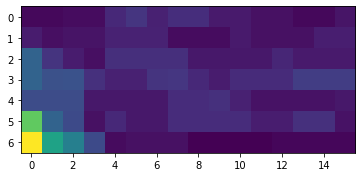

In [158]:
plt.imshow(xd1)

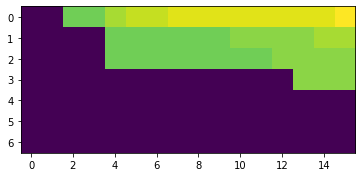

In [159]:
plt.imshow(xd2)

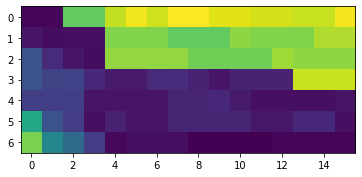

In [164]:
plt.imshow(xd1*20+xd2v2)

In [165]:
(xd1*20+xd2v2).astype(int)

array([[14, 14, 32, 32, 36, 37, 36, 38, 38, 37, 37, 36, 36, 36, 36, 37],
       [15, 14, 14, 14, 33, 33, 33, 32, 32, 32, 34, 33, 33, 33, 35, 35],
       [20, 16, 15, 14, 34, 34, 34, 34, 33, 33, 33, 33, 34, 34, 34, 34],
       [20, 18, 18, 16, 15, 15, 16, 16, 16, 15, 16, 16, 16, 36, 36, 36],
       [18, 18, 18, 15, 15, 15, 15, 16, 16, 16, 15, 14, 14, 14, 14, 15],
       [28, 20, 18, 14, 16, 15, 15, 16, 16, 16, 16, 15, 15, 16, 16, 14],
       [33, 25, 22, 18, 14, 14, 14, 14, 13, 13, 13, 13, 14, 14, 14, 14]])

In [152]:
dts

array([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000,
       2100, 2200, 2300, 2400, 2500])

In [153]:
nrs

array([ 9, 11, 13, 15, 17, 19, 21])

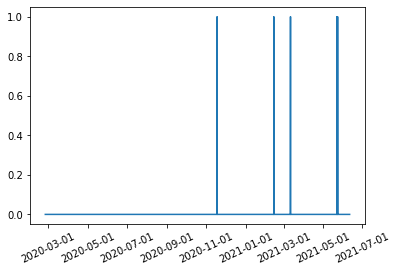

In [126]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)

plt.plot(time,NW_EDIT)

In [20]:
events = NW_EDIT

In [21]:
EP = Epoch[np.where(events==1)]

In [22]:
EV = events[np.where(events==1)]

In [23]:
EP.shape[0]

283

In [12]:
time

array([datetime.datetime(2020, 2, 25, 1, 20, 5, 961723),
       datetime.datetime(2020, 2, 25, 1, 20, 15, 961739),
       datetime.datetime(2020, 2, 25, 1, 20, 25, 961755), ...,
       datetime.datetime(2021, 6, 11, 6, 10, 17, 784307),
       datetime.datetime(2021, 6, 11, 6, 10, 33, 784333),
       datetime.datetime(2021, 6, 11, 6, 10, 49, 784360)], dtype=object)